# TTV Retrieval for Kepler-36 (a well-studied, dynamically-interacting system)

In this notebook, we will perform a dynamical retrieval for Kepler-36 = KOI-277. With two neighboring planets of drastically different densities (the inner planet is rocky and the outer planet is gaseous; see [Carter et al. 2012](https://ui.adsabs.harvard.edu/abs/2012Sci...337..556C/abstract)), this is one of the more well-studied TTV systems in existence. First, let's import packages and download data from the Rowe et al. (2015) TTV catalog:

Data retrieved!


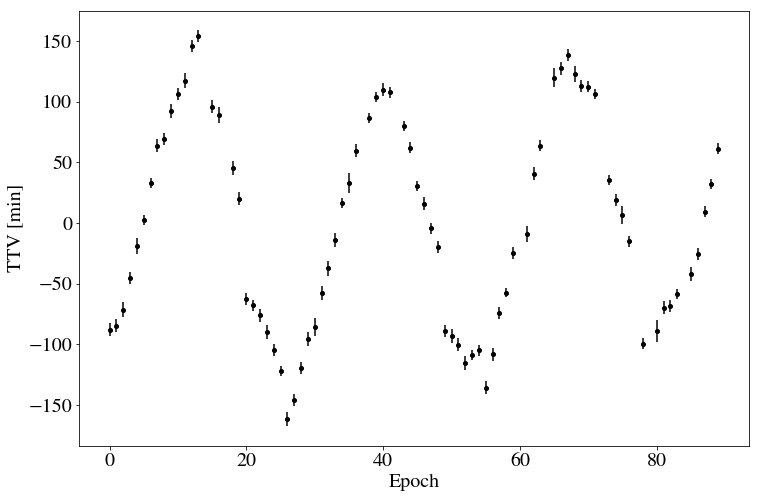

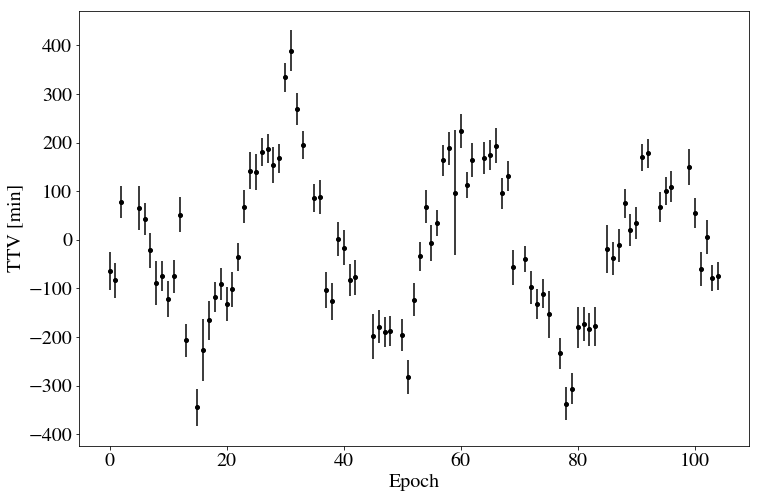

In [1]:
%matplotlib inline
import ttvnest
import numpy as np

koi = 277
nplanets = 2
data, errs, epochs = ttvnest.load_data.get_data(koi, nplanets)
system = ttvnest.TTVSystem()
system.data = data
system.errs = errs
system.epochs = epochs
ttvnest.plot_utils.plot_ttv_data(system)

Clear, anticorrelated signals! Now let's try to model it with ttvnest. I'll change the reference/simulation start time to $t_\mathrm{kep} + 50 = 2454950$ (BJD) to make the simulation run a little faster; note that this is the same choice of reference time as Carter et al. (2012).

In [2]:
data -= 50
kepler36_b = ttvnest.TTVPlanet(data[1], errs[1], epochs[1], mass_prior = ('Uniform', 0, 30.), 
                     period_prior = ('Normal', 13.84, 0.01),
                     t0_prior = ('Normal', data[1][0] - epochs[1][0]*13.84, errs[1][0]))

kepler36_c = ttvnest.TTVPlanet(data[0], errs[0], epochs[0], mass_prior = ('Uniform', 0, 30.), 
                     period_prior = ('Normal', 16.23, 0.01),
                     t0_prior = ('Normal', data[0][0] - epochs[0][0]*16.23, errs[0][0]))

kepler36 = ttvnest.TTVSystem(kepler36_b, kepler36_c, start_time = ttvnest.constants.tkep + 50, sim_length = 1460)

In [3]:
results = kepler36.retrieve()

5662it [09:56,  4.20it/s, batch: 0 | bound: 2 | nc: 25 | ncall: 60180 | eff(%):  9.255 | loglstar:   -inf <   -inf <    inf | logz:   -inf +/-    nan | dlogz:    inf >  0.010] /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:241: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
6072it [12:25,  1.38it/s, batch: 0 | bound: 6 | nc: 172 | ncall: 74570 | eff(%):  8.035 | loglstar:   -inf <   -inf <    inf | logz:   -inf +/-    nan | dlogz:    inf >  0.010] /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:241: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
6217it [15:13,  4.09it/s, batch: 0 | bound: 8 | nc: 25 | ncall: 92138 | eff(%):  6.675 | loglstar:   -inf <   -inf <    inf | logz:   -inf +/-    nan | dlogz:    inf >  0.010]   /usr/local/

34402it [2:16:30,  4.70it/s, batch: 0 | bound: 226 | nc: 25 | ncall: 879923 | eff(%):  3.905 | loglstar:   -inf < 236.429 <    inf | logz: 198.905 +/-    nan | dlogz: 83.671 >  0.010]   /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:219: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:241: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
36452it [2:24:34,  4.65it/s, batch: 0 | bound: 241 | nc: 25 | ncall: 935424 | eff(%):  3.893 | loglstar:   -inf < 271.069 <    inf | logz: 232.095 +/-    nan | dlogz: 58.506 >  0.010]  /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:219: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-fact

/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:241: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
40853it [2:52:03,  4.08it/s, batch: 0 | bound: 288 | nc: 25 | ncall: 1122218 | eff(%):  3.637 | loglstar:   -inf < 322.095 <    inf | logz: 279.049 +/-    nan | dlogz: 37.210 >  0.010]  /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:219: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:241: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
40961it [2:53:09,  4.53it/s, batch: 0 | bound: 290 | nc: 25 | ncall: 1129639 | eff(%):  3.623 | loglstar:   -inf < 323.

44033it [3:15:19,  4.51it/s, batch: 0 | bound: 324 | nc: 25 | ncall: 1278588 | eff(%):  3.441 | loglstar:   -inf < 346.128 <    inf | logz: 300.458 +/-    nan | dlogz: 37.496 >  0.010]  /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:219: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:241: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
44389it [3:18:01,  4.57it/s, batch: 0 | bound: 328 | nc: 25 | ncall: 1296780 | eff(%):  3.420 | loglstar:   -inf < 348.480 <    inf | logz: 302.389 +/-    nan | dlogz: 39.649 >  0.010]  /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:219: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-fac

/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:241: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
47318it [3:43:33,  5.04it/s, batch: 0 | bound: 362 | nc: 25 | ncall: 1470487 | eff(%):  3.216 | loglstar:   -inf < 365.451 <    inf | logz: 316.634 +/-    nan | dlogz: 26.912 >  0.010]  /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:219: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:241: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
47388it [3:45:32,  5.01it/s, batch: 0 | bound: 364 | nc: 25 | ncall: 1484674 | eff(%):  3.190 | loglstar:   -inf < 365.

49757it [4:08:31,  5.00it/s, batch: 0 | bound: 395 | nc: 25 | ncall: 1651862 | eff(%):  3.010 | loglstar:   -inf < 378.707 <    inf | logz: 327.530 +/-    nan | dlogz: 27.987 >  0.010]   /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:219: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:241: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
49999it [4:11:18,  5.16it/s, batch: 0 | bound: 398 | nc: 25 | ncall: 1672251 | eff(%):  2.988 | loglstar:   -inf < 379.957 <    inf | logz: 328.541 +/-    nan | dlogz: 26.733 >  0.010]   /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:219: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-f

73683it [5:47:19,  1.91it/s, batch: 0 | bound: 593 | nc: 165 | ncall: 2377712 | eff(%):  3.098 | loglstar:   -inf < 420.383 <    inf | logz: 352.972 +/-    nan | dlogz:  0.010 >  0.010] /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:241: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
80272it [6:10:31,  5.21it/s, batch: 2 | bound: 664 | nc: 25 | ncall: 2520789 | eff(%):  3.184 | loglstar: 410.648 < 418.502 < 415.256 | logz: 352.976 +/-    nan | stop:  0.874]          


Let's check out our results. I'm not going to work out the Carter et al. (2012) posterior distribution on the eccentricity vectors since they use a different basis than I choose here. But it's probably worth converting their mass ratio constraints to what we should expect here. They get a mass ratio sum $q_+ = (M_1 + M_2)/M_\star= 3.51\times10^{-5}$. In ttvnest dynamical masses are normalized by $3\times10^{-6} = M_\mathrm{Earth}/M_\mathrm{Sun}$, so this gives $q_+ = 11.7$ in our units. Their planetary mass ratio is $q_p = M_1/M_2 = 0.55$. Taken together, this gives dynamical masses of $M_1/M_\star = 4.15$ and $M_2/M_\star = 7.55$.

Let's see if we get there...

Summary (middle 95 percentile): 
$M_1/M_\star$: $3.979534^{+0.159585}_{-0.136942}$
$P_1\ [\mathrm{days}]$: $13.839171^{+0.000592}_{-0.000513}$
$e_1\cos(\omega_1)$: $-0.012336^{+0.019459}_{-0.019988}$
$e_1\sin(\omega_1)$: $0.06314^{+0.01125}_{-0.0139}$
$T_{0,1}\ [\mathrm{days}]$: $10.94625^{+0.007338}_{-0.007603}$
$M_2/M_\star$: $7.184838^{+0.170211}_{-0.177829}$
$P_2\ [\mathrm{days}]$: $16.239764^{+0.000344}_{-0.00038}$
$e_2\cos(\omega_2)$: $-0.015659^{+0.017261}_{-0.017756}$
$e_2\sin(\omega_2)$: $0.032882^{+0.010048}_{-0.012482}$
$T_{0,2}\ [\mathrm{days}]$: $5.914437^{+0.001285}_{-0.002151}$


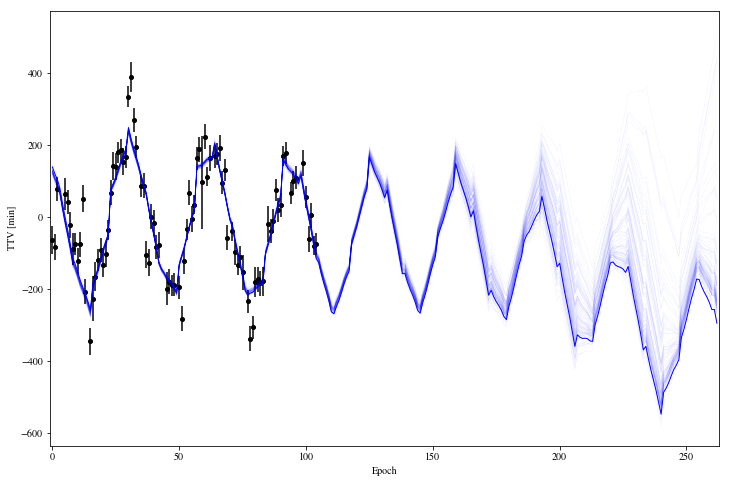

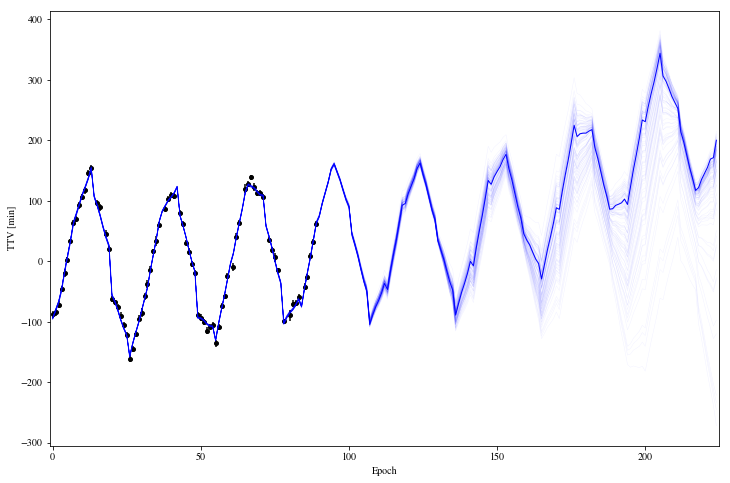

In [4]:
kepler36.posterior_summary()
ttvnest.plot_utils.plot_results(kepler36, uncertainty_curves = 100, sim_length = 365.25*10)

Nice! Let's look at the posteriors for good measure:

<Figure size 1440x1440 with 0 Axes>

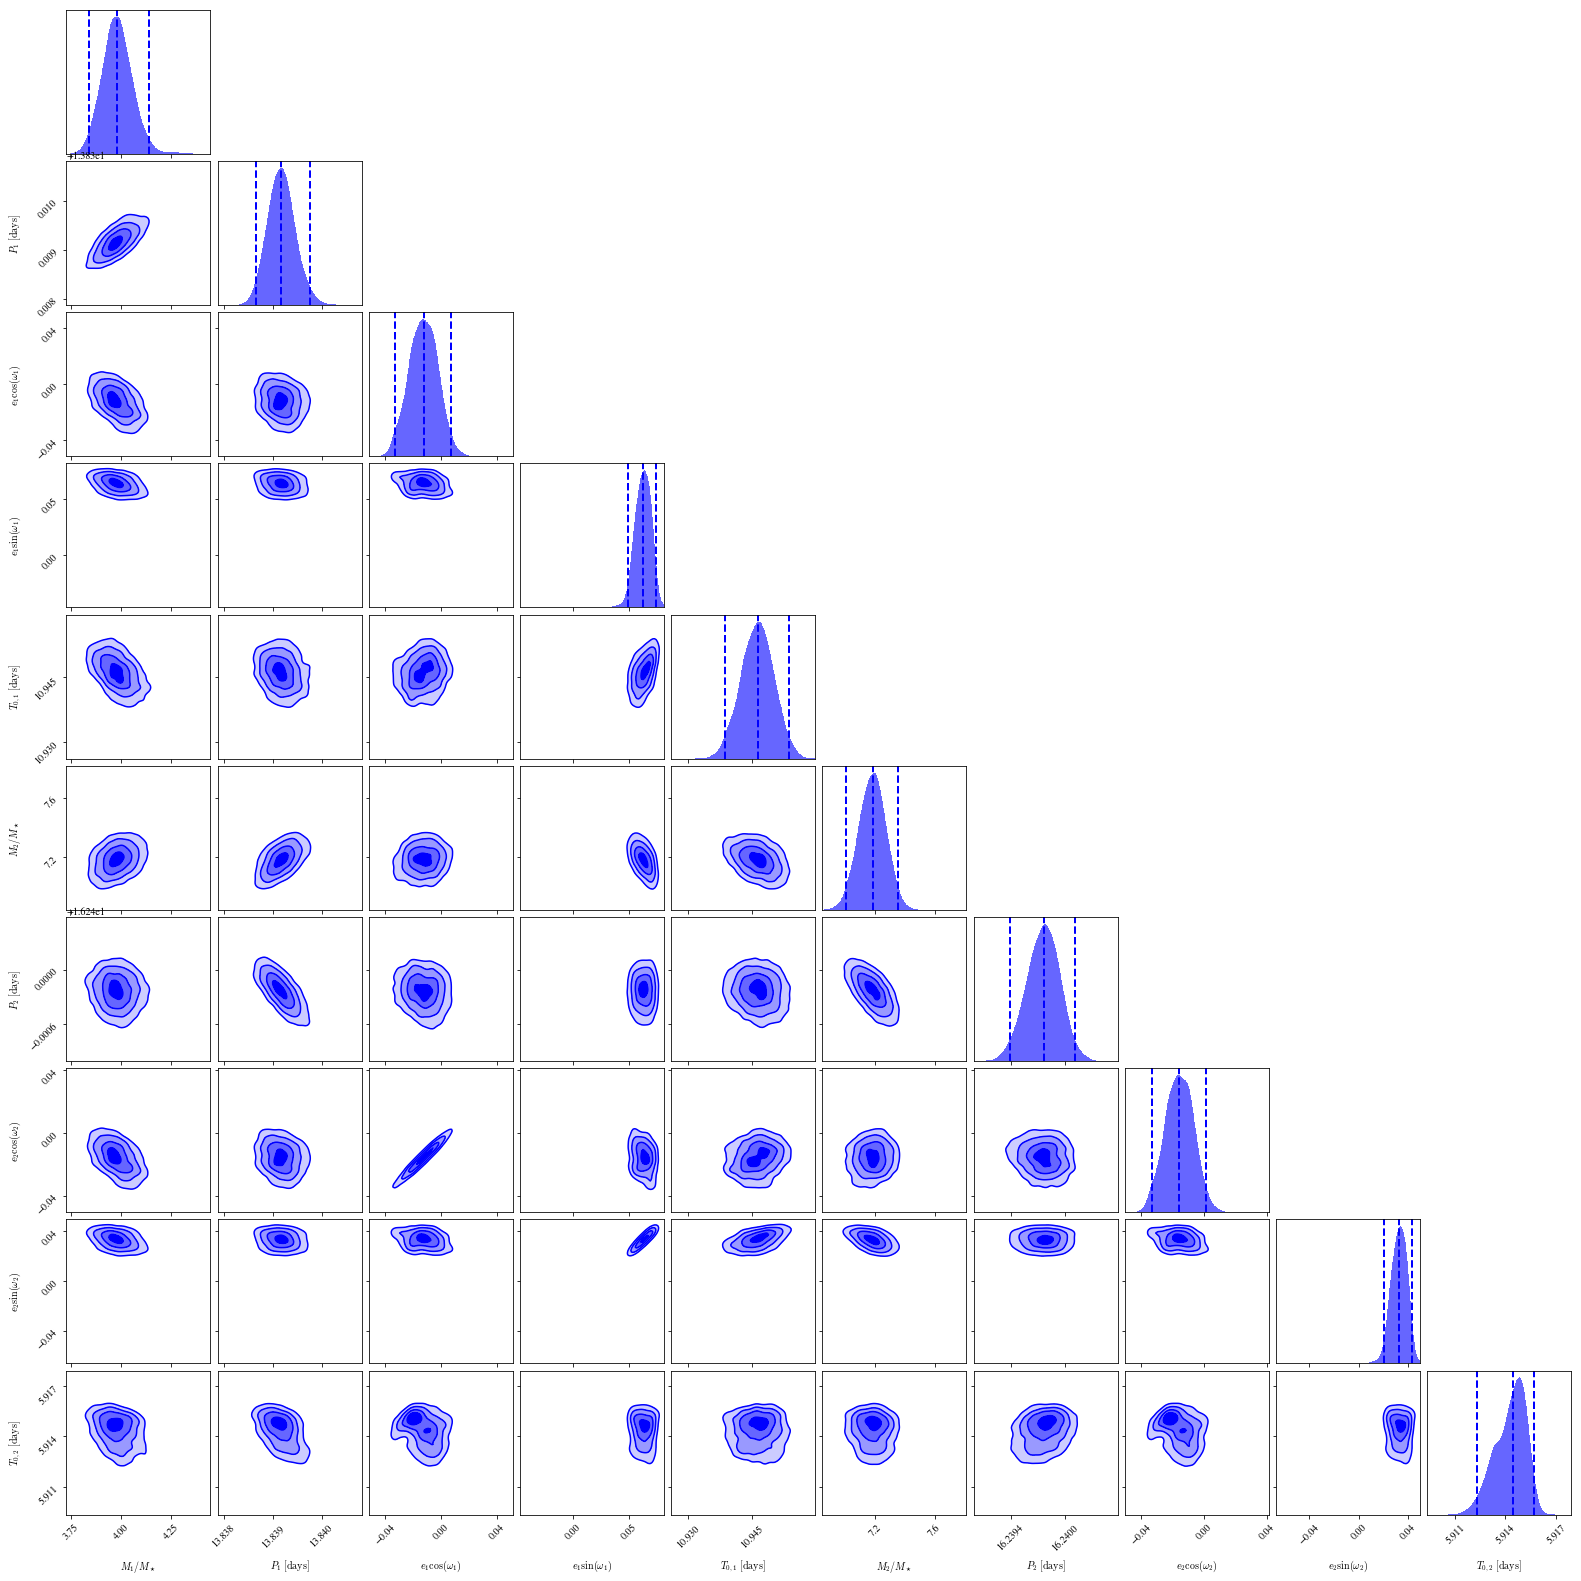

<Figure size 1440x1440 with 0 Axes>

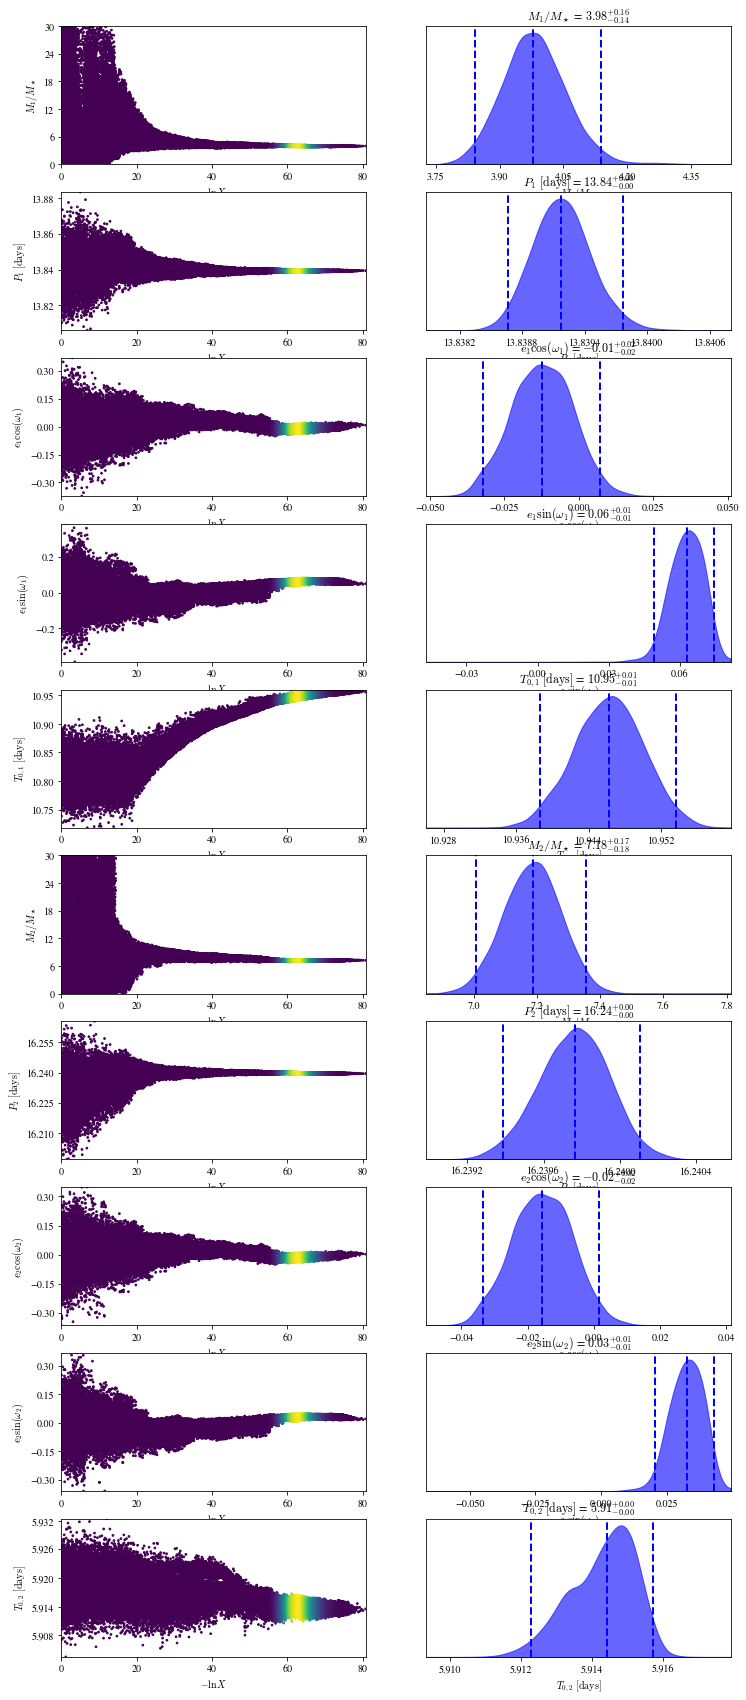

In [5]:
ttvnest.plot_utils.dynesty_plots(kepler36)

Wow, what a nice system. Let's save our results for later:

In [11]:
ttvnest.io_utils.save_results(kepler36, 'kepler36_retrieved.p')

'kepler36_retrieved.p'